In [13]:
from sklearn import datasets
import numpy as np
from matplotlib import pylab, pyplot

In [4]:
digits = datasets.load_digits()
print('Target:', digits.target[0])
print('Features: \n', digits.data[0])
print('Number of Features:', len(digits.data[0]))

Target: 0
Features: 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Number of Features: 64


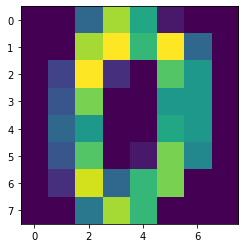

In [9]:
pylab.imshow(digits.data[0].reshape(8,8))

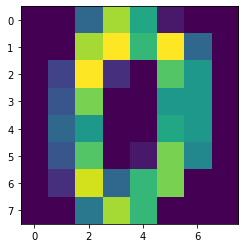

In [10]:
pylab.imshow(digits.images[0])

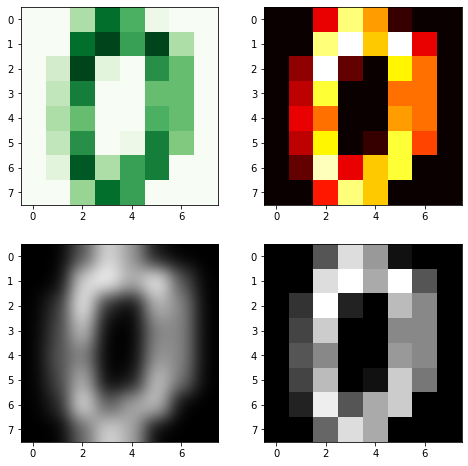

In [31]:
pyplot.figure(figsize=(8,8))
pyplot.subplot(2,2,1)
pyplot.imshow(digits.images[0], cmap='Greens')
pyplot.subplot(2,2,2)
pyplot.imshow(digits.images[0], cmap='hot')
pyplot.subplot(2,2,3)
pyplot.imshow(digits.images[0], cmap='gray', interpolation='gaussian')
pyplot.subplot(2,2,4)
pyplot.imshow(digits.images[0], cmap='gray', interpolation='nearest')

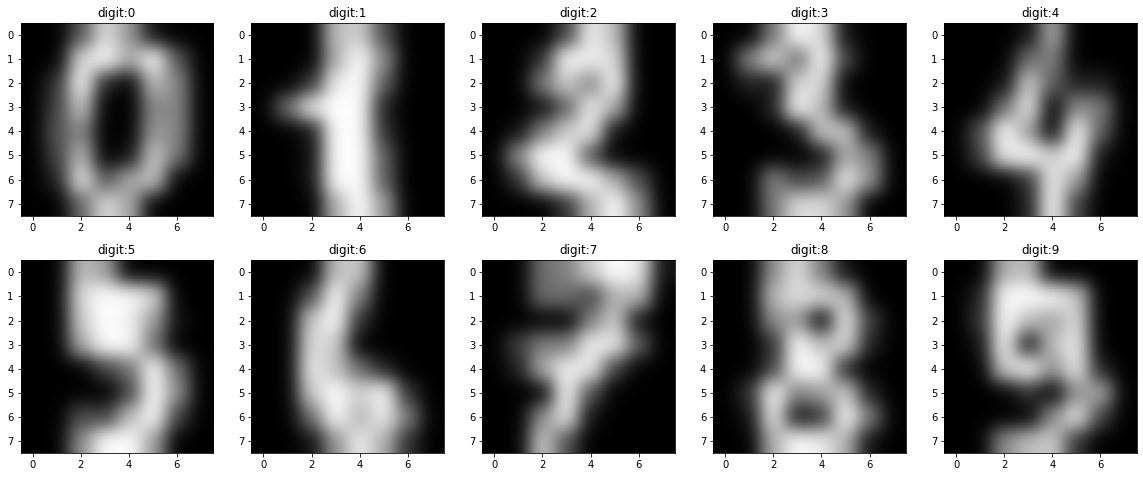

In [46]:
pyplot.figure(figsize=(20,8))
for plot_number, plot in enumerate(digits.images[:10], 1):
    pyplot.subplot(2,5,plot_number)
    pyplot.imshow(plot, cmap='gray', interpolation='gaussian')
    pyplot.title('digit:' + str(digits.target[plot_number - 1]))

#   Размерность избыточка, поэтому следует ее понизить

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from collections import Counter

In [51]:
data = digits.data[:1000]
labels = digits.target[:1000]

Counter({3: 104, 1: 102, 6: 101, 2: 100, 5: 100, 0: 99, 7: 99, 9: 99, 4: 98, 8: 98})


<BarContainer object of 10 artists>

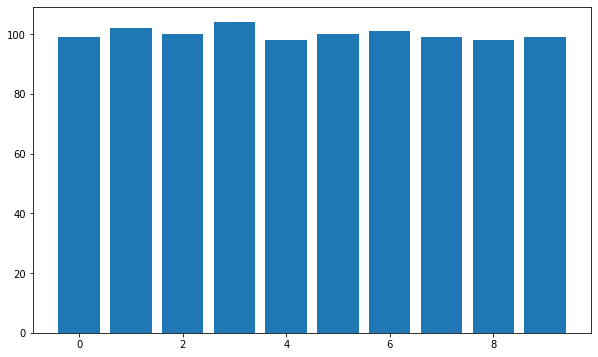

In [54]:
#   Проверим равноправность элементов в выборке
print(Counter(labels))
pylab.figure(figsize=(10,6))
pylab.bar(Counter(labels).keys(), Counter(labels).values())

#   Построение классификатора

In [55]:
classifier = KNeighborsClassifier()
classifier.fit(data, labels)

KNeighborsClassifier()

In [58]:
print(classification_report(classifier.predict(data), labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      0.97      0.99       105
           2       1.00      1.00      1.00       100
           3       1.00      0.98      0.99       106
           4       1.00      1.00      1.00        98
           5       0.99      1.00      0.99        99
           6       1.00      1.00      1.00       101
           7       0.99      0.99      0.99        99
           8       0.97      0.99      0.98        96
           9       0.96      0.98      0.97        97

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



#   Линейные методы понижения размерности
##  Случайные проекции

In [60]:
from sklearn import random_projection

In [73]:
#   n-components - количество новых компонент
projection = random_projection.SparseRandomProjection(n_components=2, random_state=0)
data_2d = projection.fit_transform(data)

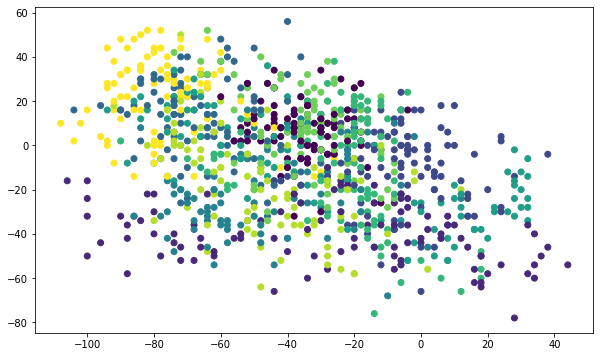

In [74]:
pylab.figure(figsize=(10,6))
pyplot.scatter(data_2d[:, 0],data_2d[:, 1], c=labels)

In [75]:
#   Дело дрянь поучим классификатор
classifier = KNeighborsClassifier()
classifier.fit(data_2d, labels)
print(classification_report(classifier.predict(data_2d), labels))

              precision    recall  f1-score   support

           0       0.74      0.47      0.58       154
           1       0.75      0.58      0.65       131
           2       0.67      0.59      0.63       113
           3       0.71      0.51      0.60       144
           4       0.38      0.56      0.45        66
           5       0.42      0.53      0.47        79
           6       0.52      0.57      0.55        93
           7       0.35      0.51      0.42        69
           8       0.37      0.58      0.45        62
           9       0.62      0.69      0.65        89

    accuracy                           0.55      1000
   macro avg       0.55      0.56      0.54      1000
weighted avg       0.60      0.55      0.56      1000



##  PCA - Метод главных компонент

In [76]:
from sklearn.decomposition import PCA

In [77]:
PCA_method = PCA(n_components=2, random_state=0)
data_2d = PCA_method.fit_transform(data)

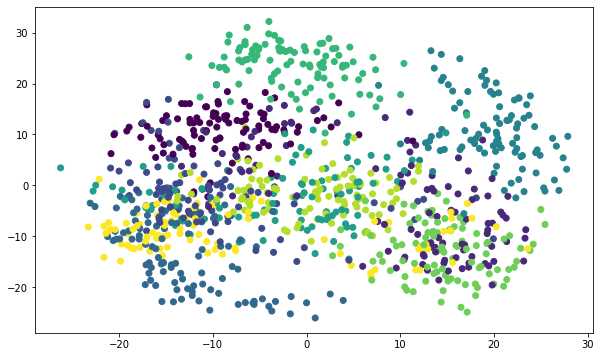

In [78]:
pylab.figure(figsize=(10,6))
pylab.scatter(data_2d[:,0], data_2d[:,1], c=labels)

In [80]:
classifier.fit(data_2d, labels)
print(classification_report(classifier.predict(data_2d), labels))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       113
           1       0.56      0.54      0.55       105
           2       0.59      0.57      0.58       104
           3       0.77      0.79      0.78       101
           4       0.95      0.93      0.94       100
           5       0.56      0.54      0.55       104
           6       0.92      0.93      0.93       100
           7       0.76      0.71      0.74       105
           8       0.62      0.66      0.64        92
           9       0.52      0.67      0.58        76

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



#   Нелинейные методы
##  MDS - многомерное шкалирование

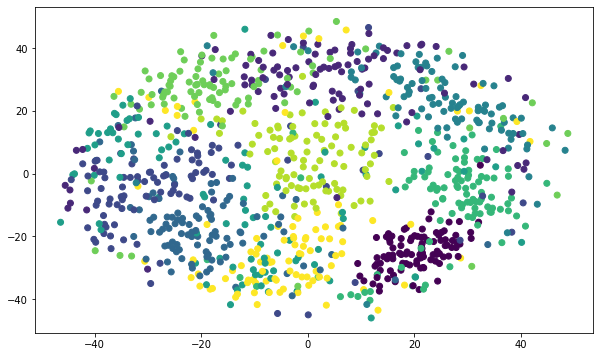

In [82]:
from sklearn import manifold
#   n-components - количество компонент
#   max_iter - максимальное количество итераций для оптимизации
mds = manifold.MDS(n_components=2, n_init=1, max_iter=100)
data_2d = mds.fit_transform(data)
pylab.figure(figsize=(10,6))
pylab.scatter(data_2d[:,0], data_2d[:,1], c=labels)

In [84]:
classifier.fit(data_2d, labels)
print(classification_report(classifier.predict(data_2d), labels))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       113
           1       0.75      0.60      0.66       127
           2       0.75      0.71      0.73       106
           3       0.73      0.77      0.75        99
           4       0.79      0.71      0.75       108
           5       0.42      0.60      0.49        70
           6       0.77      0.75      0.76       104
           7       0.65      0.81      0.72        79
           8       0.90      0.78      0.83       113
           9       0.59      0.72      0.64        81

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.72      1000
weighted avg       0.75      0.73      0.73      1000



## t-SNE

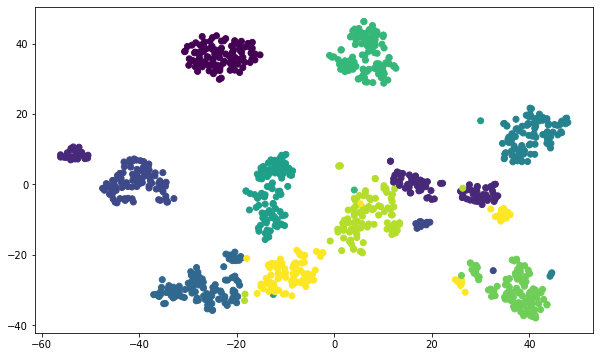

In [87]:
#   init - как инициализируется преобразование
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
data_2d = tsne.fit_transform(data)
pylab.figure(figsize=(10,6))
pylab.scatter(data_2d[:,0], data_2d[:,1], c=labels)

In [88]:
classifier.fit(data_2d, labels)
print(classification_report(classifier.predict(data_2d), labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      0.99      1.00       103
           2       0.99      1.00      0.99        99
           3       1.00      0.97      0.99       107
           4       1.00      0.99      0.99        99
           5       0.98      1.00      0.99        98
           6       0.99      1.00      1.00       100
           7       0.99      0.99      0.99        99
           8       0.97      0.98      0.97        97
           9       0.98      0.98      0.98        99

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

